In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import xarray as xr
import xgcm
import pop_tools
from collections import Counter
import more_itertools

In [2]:
ds = xr.open_dataset("/work/DXL/try/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0313-09.nc")
ds

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0313-10-01 00:00:00
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/87)
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    ...                  ...
    HMXL                (time, nlat, nlon) float32 ...
    XMXL                (time, nlat, nlon) float32 ...
    TMXL                (time, nlat, nlon) float32 ...
    HBLT                (time, nlat, nlon) float32 ...
    XBLT                (time, nlat, nlon) float32 ...
    TBLT                (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-11-04 at 00:40:42.6
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    66676259
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [3]:
grid, ds_ren = pop_tools.to_xgcm_grid_dataset(ds, periodic=False)

In [4]:
ds_ren

<xarray.Dataset>
Dimensions:             (d2: 2, nlat_t: 2400, nlat_u: 2400, nlon_t: 3600, nlon_u: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w_bot: 62, z_w_top: 62)
Coordinates: (12/13)
  * time                (time) object 0313-10-01 00:00:00
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat_u, nlon_u) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0
    ...                  ...
    TLONG               (nlat_t, nlon_t) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0
    TLAT                (nlat_t, nlon_t) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0
  * nlon_u              (nlon_u) int64 1 2 3 4 5 6 ... 3596 3597 3598 3599 3600
  * nlat_u              (nlat_u) int64 1 2 3 4 5 6 ... 2396 2397 2398 2399 2400
  * nlon_t              (nlon_t) float64 0.5 1.5 2.5 ... 3.598e+03 3.6e+03
  * nlat_t              (nlat_t) float64 0.5 1.5 2.5 ... 2.398e+03 2.4e+03
Dimensions without coordinates: d2
Data variables: (12/87)
    time_bound          (time, d2) object 0313-09-01 00:00:00 0313-10-01 00:0...
    dz                  (z_t) float32 1e+03 1e+03 1e+03 ... 2.5e+04 2.5e+04
    dzw                 (z_w_top) float32 500.0 1e+03 1e+03 ... 2.5e+04 2.5e+04
    KMT                 (nlat_t, nlon_t) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0
    KMU                 (nlat_u, nlon_u) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0
    REGION_MASK         (nlat_t, nlon_t) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0
    ...                  ...
    HMXL                (time, nlat_t, nlon_t) float32 -1.0 -1.0 ... -1.0 -1.0
    XMXL                (time, nlat_t, nlon_t) float32 -1.0 -1.0 ... -1.0 -1.0
    TMXL                (time, nlat_t, nlon_t) float32 -1.0 -1.0 ... -1.0 -1.0
    HBLT                (time, nlat_t, nlon_t) float32 -1.0 -1.0 ... -1.0 -1.0
    XBLT                (time, nlat_t, nlon_t) float32 -1.0 -1.0 ... -1.0 -1.0
    TBLT                (time, nlat_t, nlon_t) float32 -1.0 -1.0 ... -1.0 -1.0
Attributes:
    title:           B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-11-04 at 00:40:42.6
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    66676259
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [5]:
grid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   nlon_t --> right
  * right    nlon_u --> center
Z Axis (not periodic, boundary=None):
  * center   z_t --> left
  * right    z_w_bot --> center
  * left     z_w_top --> center
Y Axis (not periodic, boundary=None):
  * center   nlat_t --> right
  * right    nlat_u --> center

In [6]:
# Take topographic gradient (simple gradient over one grid cell) and move back to u-grid
dhu_dx = grid.interp( grid.diff(ds_ren.HU,'X', boundary="extend") / grid.interp(ds_ren.DXU, 'X', boundary="extend"), 'X', boundary="extend")

# Take topographic gradient (simple gradient over one grid cell) and move back to u-grid
dhu_dy = grid.interp( grid.diff(ds_ren.HU, 'Y', boundary='extend') / grid.interp(ds_ren.DYU, 'Y', boundary='extend'), 'Y', boundary='extend')

# Magnitude of the topographic slope (to normalise the topographic gradient)
topographic_slope_magnitude = np.sqrt(dhu_dx**2 + dhu_dy**2)

In [7]:
# Along-slope velocity
u_along1 = ds_ren.UVEL * dhu_dy / topographic_slope_magnitude 
u_along2 = - ds_ren.VVEL * dhu_dx / topographic_slope_magnitude
u_along = u_along1 + u_along2

# Load the data
#u_along = u_along.load()

# Similarly, we can calculate the cross-slope velocity:
v_cross = ds_ren.UVEL*dhu_dx/topographic_slope_magnitude + ds_ren.VVEL*dhu_dy/topographic_slope_magnitude

In [8]:
u_along[0,0,600,700]

<xarray.DataArray ()>
array(-18.63554962)
Coordinates:
    time     object 0313-10-01 00:00:00
    z_t      float32 500.0
    ULONG    float64 -39.9
    ULAT     float64 -50.14
    nlon_u   int64 701
    nlat_u   int64 601

In [9]:
data222=xr.open_dataset("/work/DXL/try/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0313-09.nc")
dz = data222['dz']/100
thickness = dz
UVEL = data222['UVEL']
HU = data222['HU']/100

z_t = data222['z_t']/100
z_w = data222['z_w']/100

In [10]:
u_btr = (u_along * thickness).sum('z_t') / thickness.sum('z_t')

In [11]:
u_along.shape

(1, 62, 2400, 3600)

In [12]:
u_btr[0,600,700]

<xarray.DataArray ()>
array(-5.81743347)
Coordinates:
    time     object 0313-10-01 00:00:00
    ULONG    float64 -39.9
    ULAT     float64 -50.14
    nlon_u   int64 701
    nlat_u   int64 601

In [13]:
data = np.load('lonlat.npz')

In [14]:
lon_along_contour = data['lon_along_contour']
lat_along_contour = data['lat_along_contour']
num_points = data['num_points']

In [15]:
data = np.load('lonlat222.npz')
lon_along_contour222 = data['lon_along_contour222']
lat_along_contour222 = data['lat_along_contour222']

In [16]:
# Define empty array
u_along_contour = np.zeros((len(UVEL.z_t), len(lon_along_contour)))
u_btr_contour   = np.zeros((len(lon_along_contour)))

###
#d_along_contour = np.zeros((len(lon_along_contour)))
# Finally select velocity along contour 
for ii in range(len(lon_along_contour)):
    u_along_contour[:,ii] = u_along.sel(nlon_u=lon_along_contour[ii], method='nearest').sel(nlat_u=lat_along_contour[ii], method='nearest')
for ii in range(len(lon_along_contour)):
    u_btr_contour[ii] = u_btr.sel(nlon_u=lon_along_contour[ii], method='nearest').sel(nlat_u=lat_along_contour[ii], method='nearest')

    #
#for ii in range(num_points):
    #d_along_contour[ii] = ds_ren.HU.sel(nlon_u=lon_along_contour[ii], method='nearest').sel(nlat_u=lat_along_contour[ii], method='nearest')

In [17]:
np.nanmin(lon_along_contour)

0

In [18]:
u_along_contour[0,3000]

-16.755344865199355

In [19]:
import os

file_name = 'u_along_contour'
outfile   = os.path.join(file_name+'.npz')

np.savez(outfile,u_along_contour=u_along_contour)

In [20]:
rrr = u_along.sel(nlon_u=lon_along_contour, method='nearest')

In [21]:
data = np.load('st_ocean_2d.npz')
st_ocean_2d = data['st_ocean_2d']
max_depth=data['max_depth']
thickness_contour=data['thickness_contour']


In [22]:
st_ocean_2d[:,3]

array([5.0000000e+00, 1.5000000e+01, 2.5000000e+01, 3.5000000e+01,
       4.5000000e+01, 5.5000000e+01, 6.5000000e+01, 7.5000000e+01,
       8.5000000e+01, 9.5000000e+01, 1.0500000e+02, 1.1500000e+02,
       1.2500000e+02, 1.3500000e+02, 1.4500000e+02, 1.5500000e+02,
       1.6509840e+02, 1.7547905e+02, 1.8629128e+02, 1.9766028e+02,
       2.0971138e+02, 2.2257828e+02, 2.3640883e+02, 2.5137016e+02,
       2.6765421e+02, 2.8548364e+02, 3.0511923e+02, 3.2686798e+02,
       3.5109348e+02, 3.7822763e+02, 4.0878464e+02, 4.4337769e+02,
       4.8273672e+02, 5.2772803e+02, 5.7937286e+02, 6.3886261e+02,
       7.0756329e+02, 7.8700250e+02, 8.7882526e+02, 9.8470587e+02,
       1.1062042e+03, 1.2445669e+03, 1.4004972e+03, 1.5739464e+03,
       1.7640033e+03, 1.9689442e+03, 2.1864565e+03, 2.4139717e+03,
       2.6490012e+03, 2.8893848e+03, 3.1334048e+03, 3.3797935e+03,
       3.6276704e+03, 3.8764519e+03, 4.1257681e+03, 4.3753926e+03,
       4.6251904e+03, 4.8750835e+03, 5.1250283e+03, 5.3750000e

In [23]:
thickness = thickness_contour

In [24]:
# Function to smooth data alogn the 1000 m isobath
def running_mean_2d(in_data, N):
    out_data = np.empty((np.shape(in_data)[0],np.shape(in_data)[1]))
    for yy in range(np.shape(in_data)[0]):
        cumsum_tmp = np.nancumsum(np.insert(in_data[yy,:], 0, np.nan))
        out_data[yy,int(N/2):-int(N/2)+1] = (cumsum_tmp[N:] - cumsum_tmp[:-N]) / float(N)
    return out_data

def running_mean_1d(in_data, N):
    out_data = np.empty((np.shape(in_data)[0]))
    cumsum_tmp = np.nancumsum(np.insert(in_data, 0, np.nan))
    out_data[int(N/2):-int(N/2)+1] = (cumsum_tmp[N:] - cumsum_tmp[:-N]) / float(N)
    return out_data

In [25]:
# Function to calculate regimes

def calculate_ASC_regimes(data_full, data_btr):

    # Smooth velocity along the 1000 m isobath
    N = 20
    data_smoothed     = running_mean_2d(data_full, N)
   
    data_btr_smoothed = running_mean_1d(data_btr, N)
    
    # Surface-intensified prograde flow: 0
    ASC_regimes_tmp = np.zeros(num_points)
    
    # Bottom-intensified prograde flow: 1
    upper_depth = 200 # m
    lower_depth = 200 # m
    n_val = 0.1
    thickness_lower = np.where(st_ocean_2d >= max_depth-lower_depth, thickness, np.nan)
    
    u_lower         = np.where(st_ocean_2d >= max_depth-lower_depth, data_smoothed, np.nan)
    thickness_upper = np.where(st_ocean_2d <= upper_depth, thickness, np.nan)
    u_upper         = np.where(st_ocean_2d <= upper_depth, data_smoothed, np.nan)
    # Vertical averaging
    u_lower = np.nansum(u_lower * thickness_lower, axis=0) / np.nansum(thickness_lower, axis=0)
    u_upper = np.nansum(u_upper * thickness_upper, axis=0) / np.nansum(thickness_upper, axis=0)
    # Check if surface flow < bottom flow
    ASC_regimes_tmp[np.abs(u_upper)*n_val <= np.abs(u_lower)] = 1
    
    # Retrograde flow: 2
    ASC_regimes_tmp[data_btr_smoothed > 0.1] = 2

    # Along-slope smoothing of ASC regimes
    windowed_ASC_regimes_tmp = list(more_itertools.windowed(ASC_regimes_tmp, n=N))
    # Create a new (final) array for the regime information and give it the predominant value from that window
    ASC_regimes = np.zeros(num_points)
    for ii in range(np.size(windowed_ASC_regimes_tmp, 0)-1):
        tmp = Counter(windowed_ASC_regimes_tmp[ii]).most_common(1)[0][0]
        ASC_regimes[ii+int(N/2)] = tmp
    
    # Finished
    return ASC_regimes

In [26]:
# Control


ASC_regimes_con = calculate_ASC_regimes(u_along_contour,u_btr_contour)

/home/dxl/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/home/dxl/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/dxl/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [27]:
len(max_depth)

4410

In [28]:
st_ocean_2d.shape

(62, 4410)

In [29]:
thickness.shape

(62, 4410)

In [30]:
ASC_regimes_con.shape

(4410,)

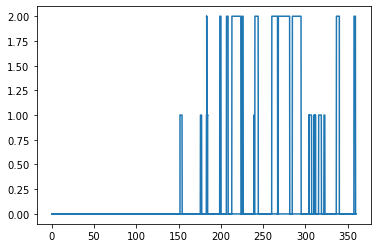

In [31]:
plt.plot(lon_along_contour222[:4410],ASC_regimes_con)

In [32]:
len(ASC_regimes_con)

4410

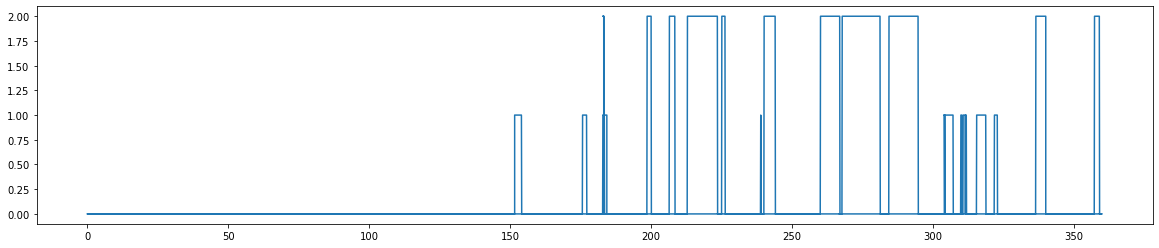

In [34]:
ft_size   = 16
title_name = ['u_along control', 'u_along change for easterlies increase', 'u_along change for easterlies decrease']
# Costum colormap
import matplotlib
# colorsList_no4 = [('lightgreen'),('blueviolet'),('tomato'),('c')]
# CustomCmap_no4 = matplotlib.colors.ListedColormap(colorsList_no4)
colorsList_no3 = [('lightgreen'),('blueviolet'),('tomato')]
CustomCmap_no3 = matplotlib.colors.ListedColormap(colorsList_no3)

fig = plt.figure(figsize=(20,4))

ax = plt.subplot(111)
plt.plot(lon_along_contour222[:4410],ASC_regimes_con)
